- Make a series of trees in series, rather than in parrallel. You will use the information from the pervious decision tree to form the next decision tree. 
- We make use of what is called a stump. A root node, with two leaves.-> these are called weak learners. WE will make use of an ensemble of these weak learners of these features. 
- Some of these weak learners will have "more" of a say since they will have a larger weight attached to themselves.
- We can OVERFIT in Adaboost, it is dificult to do, but we should keep this in mind. 
- Seems very similar to how NN is setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../DATA/mushrooms.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
df.isna().value_counts()

class  cap-shape  cap-surface  cap-color  bruises  odor   gill-attachment  gill-spacing  gill-size  gill-color  stalk-shape  stalk-root  stalk-surface-above-ring  stalk-surface-below-ring  stalk-color-above-ring  stalk-color-below-ring  veil-type  veil-color  ring-number  ring-type  spore-print-color  population  habitat
False  False      False        False      False    False  False            False         False      False       False        False       False                     False                     False                   False                   False      False       False        False      False              False       False      8124
dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

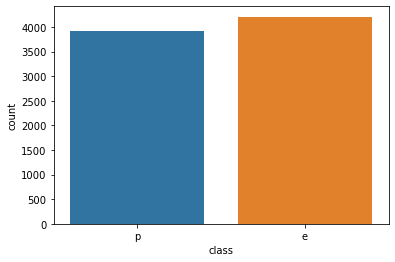

In [8]:
sns.countplot(data=df, x="class")

In [9]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [12]:
feat_uni = df.describe().transpose().reset_index().sort_values("unique")

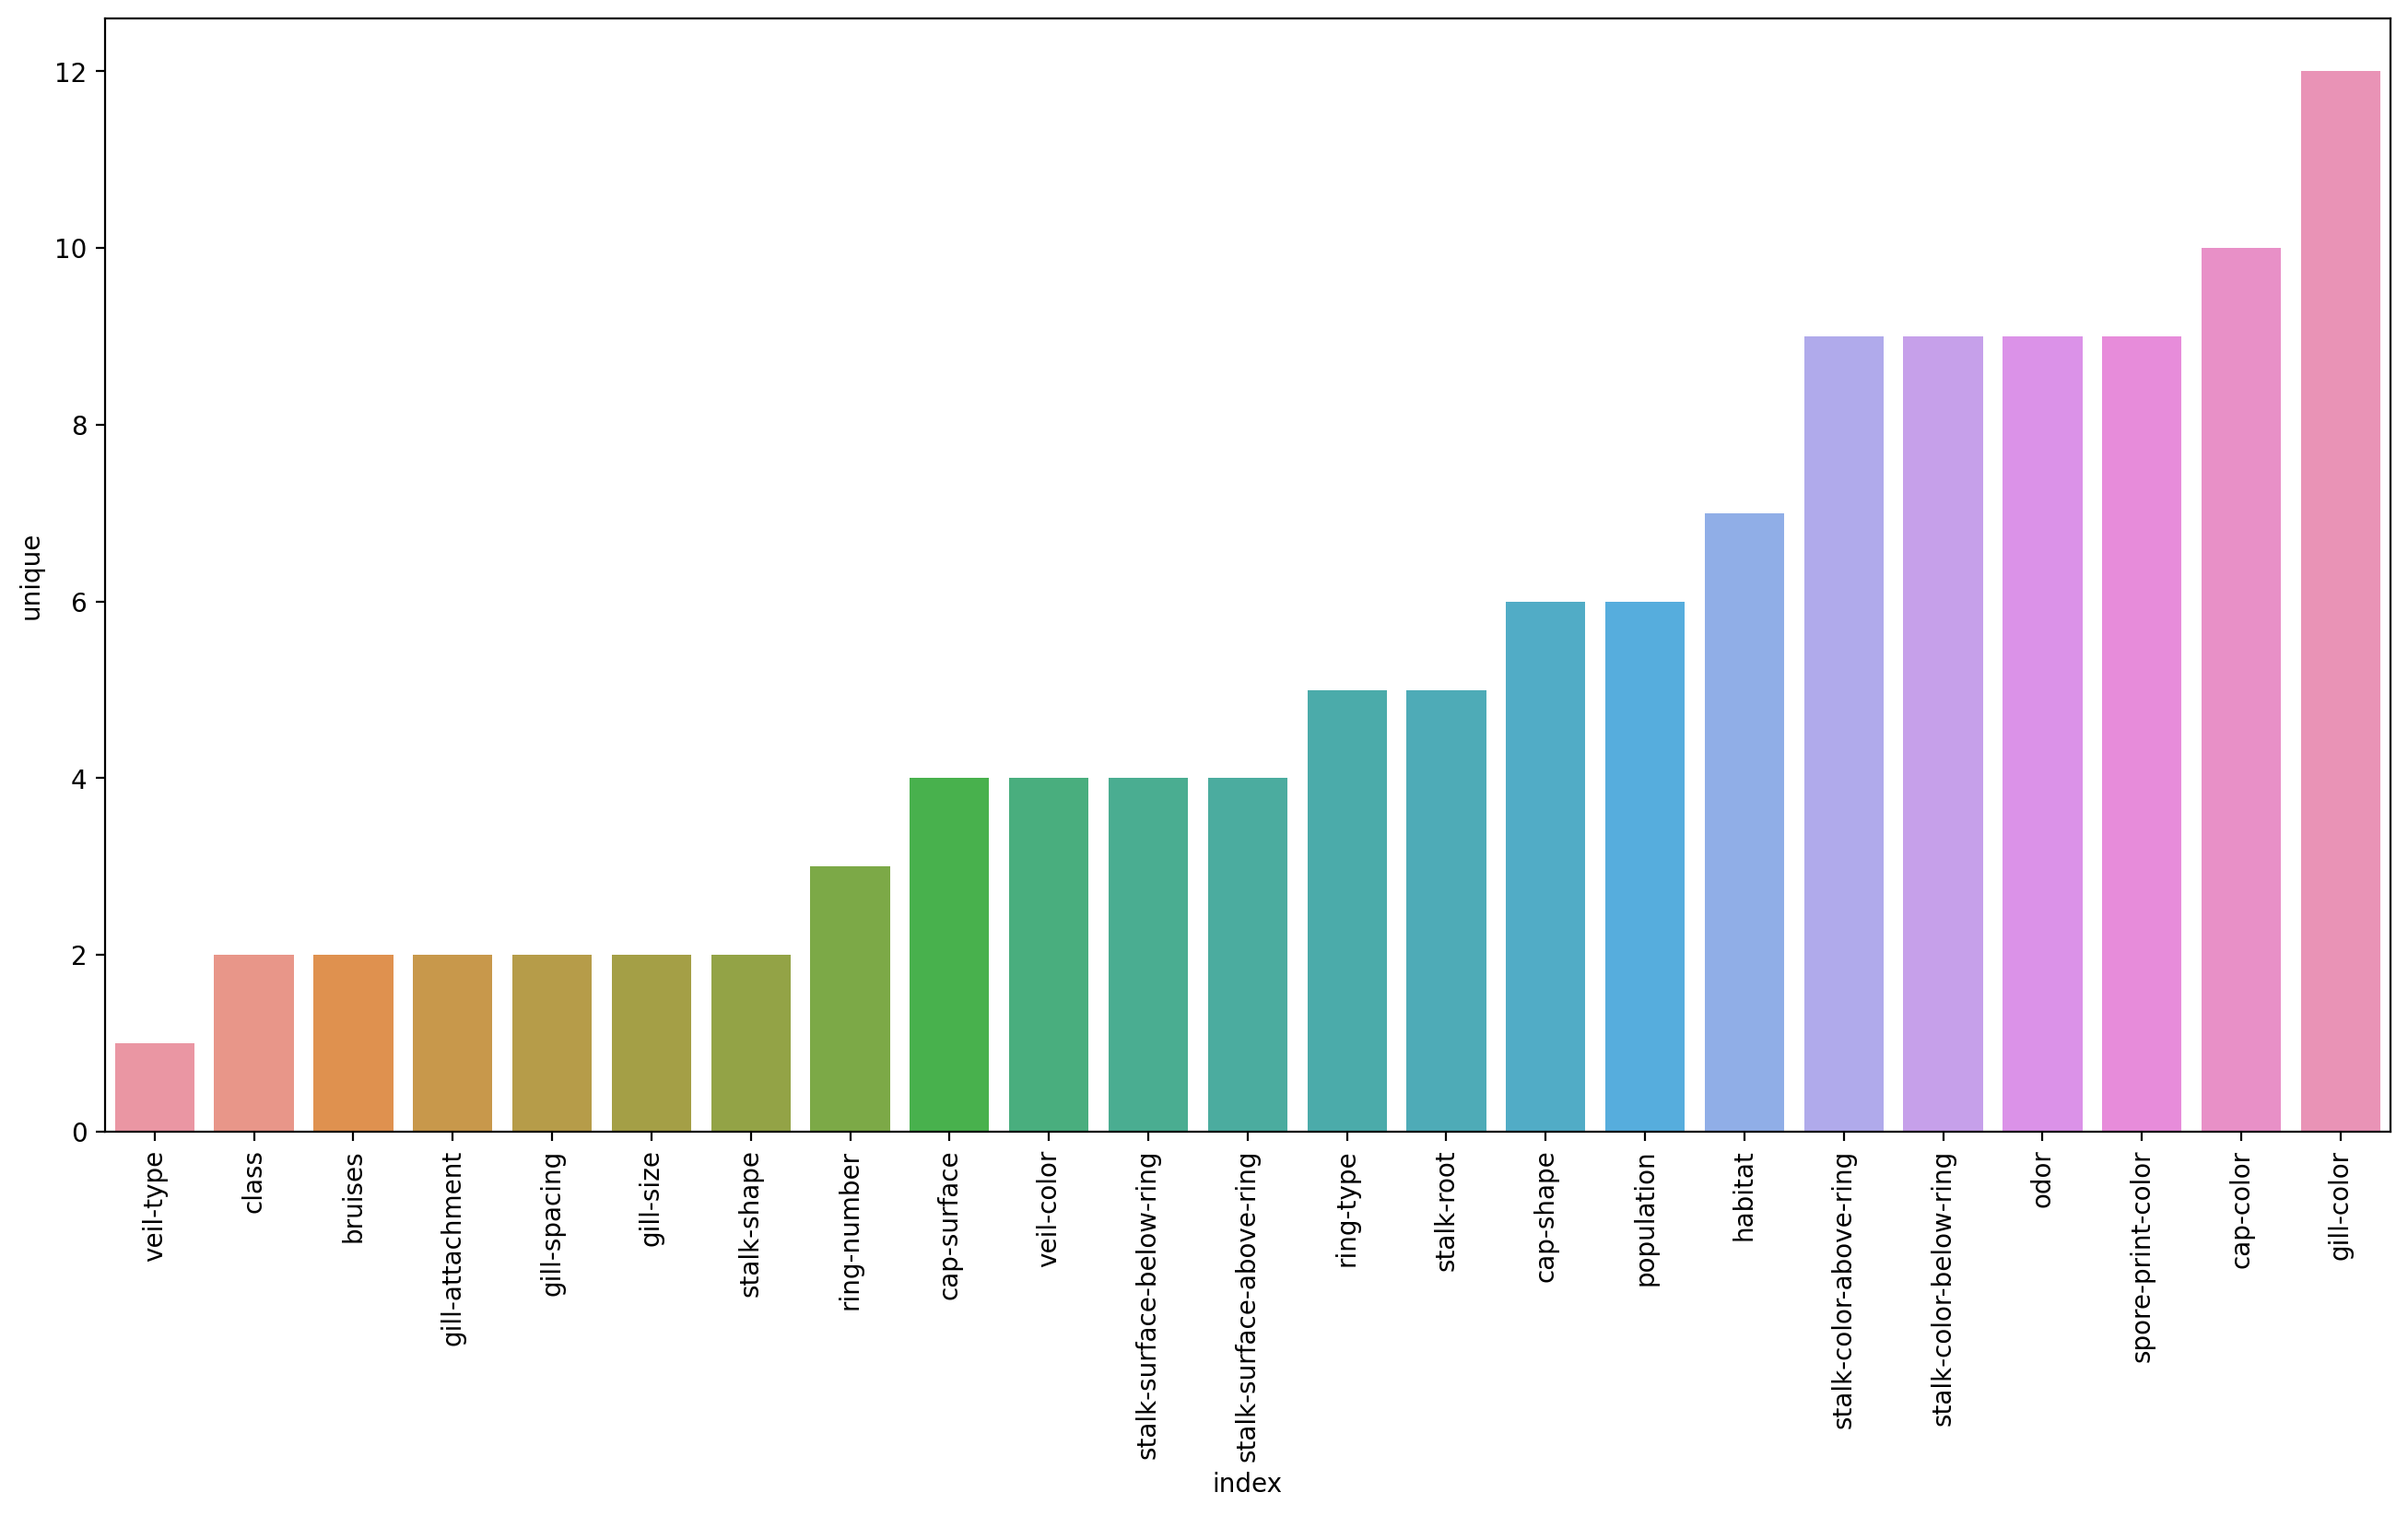

In [16]:
plt.figure(figsize=(16,8), dpi=200)
sns.barplot(data=feat_uni, x="index", y="unique")
plt.xticks(rotation=90);

In [18]:
X = df.drop("class", axis=1)
y = df["class"]

In [19]:
X = pd.get_dummies(X, drop_first=True)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [23]:
from sklearn.ensemble import AdaBoostClassifier

In [25]:
model = AdaBoostClassifier(n_estimators=1)

In [26]:
model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=1)

In [27]:
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix

In [28]:
preds = model.predict(X_test)

In [29]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           e       0.96      0.81      0.88       655
           p       0.81      0.96      0.88       564

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



In [34]:
X.columns[model.feature_importances_.argmax()]

'odor_n'

<AxesSubplot:xlabel='odor', ylabel='count'>

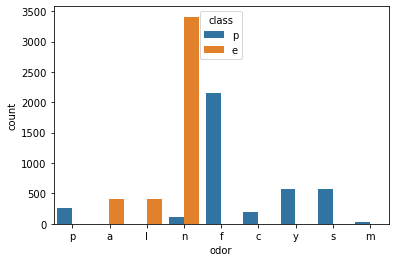

In [35]:
sns.countplot(data=df, x="odor", hue="class")

In [36]:
len(X.columns)

95

In [37]:
error_rates = []

for n in range(1, 96):
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    error = 1 - accuracy_score(y_test, preds)
    error_rates.append(error)

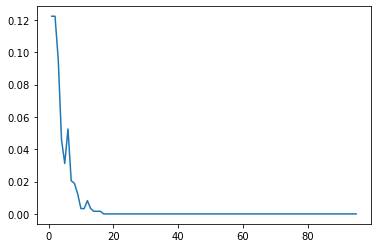

In [38]:
plt.plot(range(1,96), error_rates)

In [40]:
model

AdaBoostClassifier(n_estimators=95)

In [43]:
feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=["Importance"])

In [51]:
important = feats[feats["Importance"]>0]

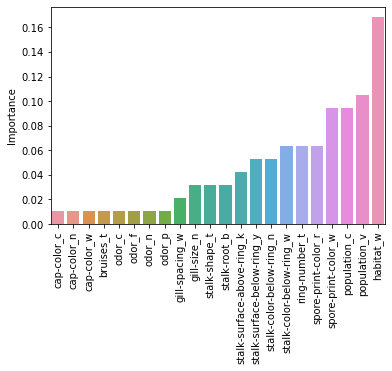

In [56]:
sns.barplot(data=important.sort_values("Importance"), x=important.index, y="Importance")
plt.xticks(rotation=90);